In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

%matplotlib inline  
from matplotlib import font_manager,rc  #rc : resource configuration_자원에대하여 설정
import matplotlib
import matplotlib.pyplot as plt


from matplotlib import font_manager,rc

font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [23]:
pd.read_csv('data.csv',index_col=0)

,대출일반,대출주택,졸업자수,사교육비,인구,자가용,직장가입자,지역가입자,사회단체참여율,수출,...,신혼부부수(합계),초혼부부 평균 출산자녀수,맞벌이 부부 수,주택소유 신혼부부 수,실업률,1인가구 비율,출생아수(명),혼인건수(건),주택매매가격동향,출산율
2000,NaN,NaN,NaN,NaN,47008111.0,NaN,NaN,NaN,NaN,172267511.0,...,NaN,NaN,NaN,NaN,4.4,NaN,NaN,NaN,NaN,1.480
2001,NaN,NaN,NaN,NaN,47370164.0,NaN,NaN,NaN,NaN,150439144.0,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1.309
2002,NaN,NaN,NaN,NaN,47644736.0,NaN,NaN,NaN,NaN,162470528.0,...,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,1.178
2003,NaN,NaN,NaN,NaN,47892330.0,NaN,NaN,NaN,44.8,193817443.0,...,NaN,NaN,NaN,NaN,3.6,NaN,NaN,NaN,NaN,1.191
2004,NaN,NaN,NaN,NaN,48082519.0,NaN,NaN,NaN,NaN,253844672.0,...,NaN,NaN,NaN,NaN,3.7,NaN,NaN,NaN,NaN,1.164
2005,NaN,NaN,NaN,NaN,48184561.0,NaN,NaN,NaN,NaN,284418743.0,...,NaN,NaN,NaN,NaN,3.7,NaN,NaN,NaN,NaN,1.085
2006,NaN,NaN,NaN,NaN,48438292.0,NaN,NaN,NaN,38.8,325464848.0,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,1.132
2007,NaN,NaN,NaN,200400.0,48683638.0,NaN,NaN,NaN,NaN,371489086.0,...,NaN,NaN,NaN,NaN,3.2,NaN,NaN,NaN,NaN,1.259
2008,NaN,NaN,NaN,209095.0,49054708.0,NaN,NaN,NaN,NaN,422007328.0,...,NaN,NaN,NaN,NaN,3.2,NaN,NaN,NaN,NaN,1.192
2009,NaN,NaN,NaN,216259.0,49307835.0,NaN,75391264.0,27525025.0,39.8,363533561.0,...,NaN,NaN,NaN,NaN,3.6,NaN,NaN,NaN,NaN,1.149


# df 만들기


In [ ]:
div=pd.read_csv('이혼건수.csv',index_col=0)

med=pd.read_csv('매체이용율.csv',index_col =0)

sup=pd.read_csv("부양비.csv",index_col=0)

dea=pd.read_csv('사망자수.csv',index_col=0)

cou=pd.read_csv('부부 수.csv',index_col=0)

une=pd.read_csv('실업률.csv',index_col=0)

alone=pd.read_csv('1인가구비율.csv',index_col=0)

In [ ]:
div.index=div.index.astype('int64') 
med.index=med.index.astype('int64') 
sup.index=sup.index.astype('int64')
dea.index=dea.index.astype('int64')
cou.index=cou.index.astype('int64')
une.index=une.index.astype('int64')
alone.index=alone.index.astype('int64')

In [ ]:
df = [div,med,sup,dea,cou,une,alone] # 여러개의 파일들을 df 로 지정해서 인스턴스하면
result = pd.concat(df,axis=1) # concat 합치기가 아주 편함

In [ ]:
result.sort_index(ascending=False, inplace=True)

In [ ]:
result

In [30]:
pd.read_csv('sydf.csv',encoding='utf-8',index_col=0) # 몇번째 열을 인덱스로 할것인가

,전국 이혼건수,TV (%),라디오 (%),신문 (%),인터넷 (%),스마트폰 (%),유소년부양비,노년부양비,노령화지수,사망자수,신혼부부수(합계),초혼부부 평균 출산자녀수,맞벌이 부부 수,주택소유 신혼부부 수,실업률,1인가구 비율
2018,108684,76.6,10.1,4.2,-,84.6,17.5,19.6,111.9,298820,1322406.0,0.74,594409.0,594721.0,3.8,29.2
2017,106032,77.2,10.6,5.2,-,81.4,17.9,18.8,105.1,285534,1379766.0,0.78,585957.0,616621.0,3.7,28.7
2016,107328,75.4,10.1,6.6,-,81,18.3,18.0,98.4,280827,1436948.0,0.80,603281.0,633642.0,3.7,28.1
2015,109153,76.2,8.9,7.1,-,73.7,18.8,17.5,93.0,275895,1471647.0,0.82,595850.0,640709.0,3.6,27.4
2014,115510,78.4,9.5,8.2,-,70.8,19.4,16.8,87.0,267692,NaN,NaN,NaN,NaN,3.5,NaN
2013,115292,79.4,11.8,10.0,-,65.8,20.0,16.3,81.5,266257,NaN,NaN,NaN,NaN,3.1,NaN
2012,114316,81.4,12.5,12.2,-,52.6,20.6,15.6,76.1,267221,NaN,NaN,NaN,NaN,3.2,NaN
2011,114284,81.6,14.8,16.5,44.4,-,21.2,15.0,71.0,257396,NaN,NaN,NaN,NaN,3.4,NaN
2010,116858,82.6,16.2,18.5,45.2,-,22.0,14.8,67.2,255405,NaN,NaN,NaN,NaN,3.7,NaN
2009,123999,83.9,20.2,22.2,46.2,-,22.9,14.4,62.9,246942,NaN,NaN,NaN,NaN,3.6,NaN


# 합친 data frame

In [38]:
data = pd.read_csv('data.csv',index_col=0,encoding='utf-8')

In [39]:
data.drop(2019,axis=0,inplace=True)

In [40]:
data

,대출일반,대출주택,졸업자수,사교육비,인구,자가용,직장가입자,지역가입자,사회단체참여율,수출,...,신혼부부수(합계),초혼부부 평균 출산자녀수,맞벌이 부부 수,주택소유 신혼부부 수,실업률,1인가구 비율,출생아수(명),혼인건수(건),주택매매가격동향,출산율
2000,NaN,NaN,NaN,NaN,47008111.0,NaN,NaN,NaN,NaN,172267511.0,...,NaN,NaN,NaN,NaN,4.4,NaN,NaN,NaN,NaN,1.480
2001,NaN,NaN,NaN,NaN,47370164.0,NaN,NaN,NaN,NaN,150439144.0,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1.309
2002,NaN,NaN,NaN,NaN,47644736.0,NaN,NaN,NaN,NaN,162470528.0,...,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,1.178
2003,NaN,NaN,NaN,NaN,47892330.0,NaN,NaN,NaN,44.8,193817443.0,...,NaN,NaN,NaN,NaN,3.6,NaN,NaN,NaN,NaN,1.191
2004,NaN,NaN,NaN,NaN,48082519.0,NaN,NaN,NaN,NaN,253844672.0,...,NaN,NaN,NaN,NaN,3.7,NaN,NaN,NaN,NaN,1.164
2005,NaN,NaN,NaN,NaN,48184561.0,NaN,NaN,NaN,NaN,284418743.0,...,NaN,NaN,NaN,NaN,3.7,NaN,NaN,NaN,NaN,1.085
2006,NaN,NaN,NaN,NaN,48438292.0,NaN,NaN,NaN,38.8,325464848.0,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,1.132
2007,NaN,NaN,NaN,200400.0,48683638.0,NaN,NaN,NaN,NaN,371489086.0,...,NaN,NaN,NaN,NaN,3.2,NaN,NaN,NaN,NaN,1.259
2008,NaN,NaN,NaN,209095.0,49054708.0,NaN,NaN,NaN,NaN,422007328.0,...,NaN,NaN,NaN,NaN,3.2,NaN,NaN,NaN,NaN,1.192
2009,NaN,NaN,NaN,216259.0,49307835.0,NaN,75391264.0,27525025.0,39.8,363533561.0,...,NaN,NaN,NaN,NaN,3.6,NaN,NaN,NaN,NaN,1.149


In [41]:
dmean=data.fillna(np.mean(data)) # 결측치가 너무 많음.............. 평균으로 덧씌우면 데이터가 좀...

In [42]:
dmean.columns

Index(['대출일반', '대출주택', '졸업자수', '사교육비', '인구', '자가용', '직장가입자', '지역가입자',
       '사회단체참여율', '수출', '수입', '실질국내총생산(GDP)', '1인당주거면적', '고등교육이수율', '원자료',
       'e러닝시장규모', '문화여가지출률', '지니계수', '다문화출생아수', '전국 이혼건수 ', 'TV (%)',
       '라디오 (%)', '신문 (%)', '인터넷 (%)', '스마트폰 (%)', '유소년부양비', '노년부양비', '노령화지수',
       '사망자수', '신혼부부수(합계)', '초혼부부 평균 출산자녀수', '맞벌이 부부 수', '주택소유 신혼부부 수', '실업률',
       '1인가구 비율', '출생아수(명)', '혼인건수(건)', '주택매매가격동향', '출산율'],
      dtype='object')

In [43]:
del dmean['인터넷 (%)']

In [44]:
del dmean['스마트폰 (%)']

In [45]:
dmean['출산율']

2000    1.480
2001    1.309
2002    1.178
2003    1.191
2004    1.164
2005    1.085
2006    1.132
2007    1.259
2008    1.192
2009    1.149
2010    1.226
2011    1.244
2012    1.297
2013    1.187
2014    1.205
2015    1.239
2016    1.172
2017    1.052
2018    0.977
Name: 출산율, dtype: float64

In [18]:
dmean.shape

(19, 37)

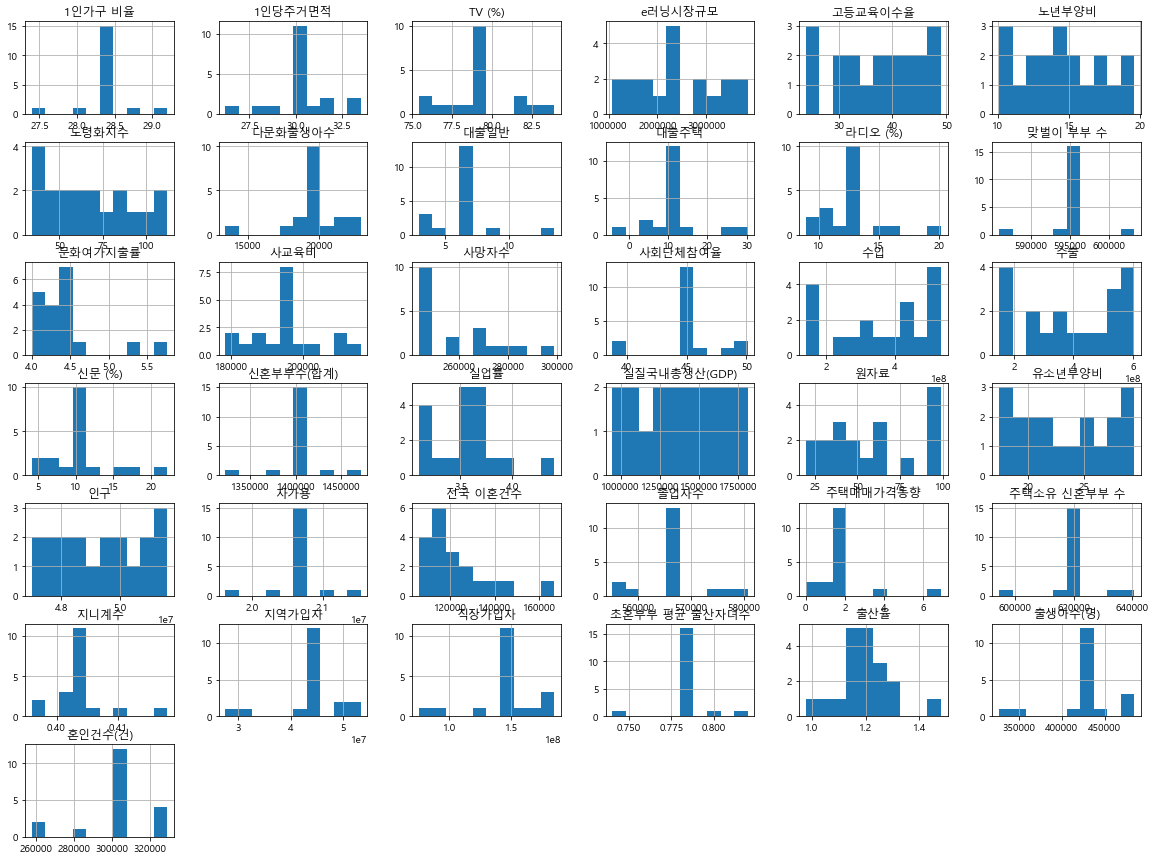

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
dmean.hist(figsize=(20,15))
plt.show()

C:\Users\ICT01_10\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\ICT01_10\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ICT01_10\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01

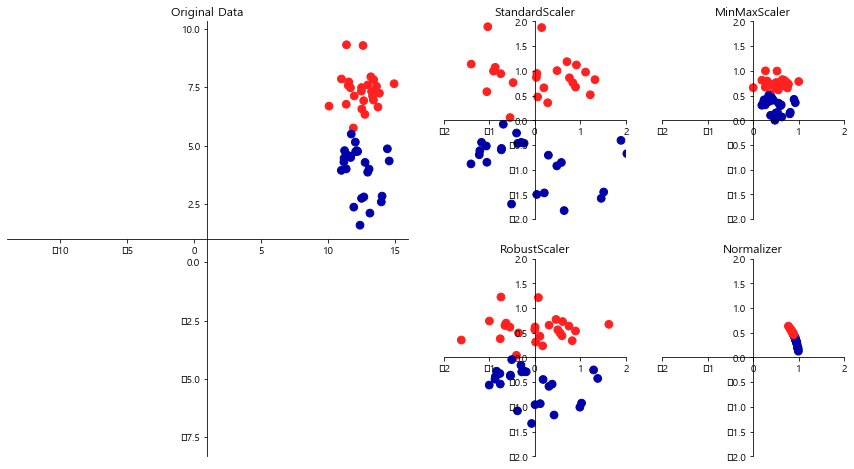

In [20]:
%matplotlib inline
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_scaling()

In [81]:
Y=dmean['출산율'] # 이렇게 뽑아내면 1D series
#Y.info =Series' object has no attribute 'info'

X=dmean.iloc[:,:-1]
Y=dmean.iloc[:,-1] # 한개의 열만 추출하면  series
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 2000 to 2018
Data columns (total 36 columns):
대출일반             19 non-null float64
대출주택             19 non-null float64
졸업자수             19 non-null float64
사교육비             19 non-null float64
인구               19 non-null float64
자가용              19 non-null float64
직장가입자            19 non-null float64
지역가입자            19 non-null float64
사회단체참여율          19 non-null float64
수출               19 non-null float64
수입               19 non-null float64
실질국내총생산(GDP)     19 non-null float64
1인당주거면적          19 non-null float64
고등교육이수율          19 non-null float64
원자료              19 non-null float64
e러닝시장규모          19 non-null float64
문화여가지출률          19 non-null float64
지니계수             19 non-null float64
다문화출생아수          19 non-null float64
전국 이혼건수          19 non-null float64
TV (%)           19 non-null float64
라디오 (%)          19 non-null float64
신문 (%)           19 non-null float64
유소년부양비           19 non-null float64
노년부양

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#X = MinMaxScaler().fit(X)

Y = MinMaxScaler().fit(Y)
#X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=0)

#훈련정확도 < 테스트세트 정확도 | 과소적합 : 데이터를 늘려야함

# 훈련정확도 > 테스트세트 정확도 | 과대적합 : 하이퍼파라미터 조정


ValueError: Expected 2D array, got 1D array instead:
array=[1.48  1.309 1.178 1.191 1.164 1.085 1.132 1.259 1.192 1.149 1.226 1.244
 1.297 1.187 1.205 1.239 1.172 1.052 0.977].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# SVR 서포트벡터머신 Resgressor

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_scaled, y_train) 
X_test_scaled = scaler.transform(X_test)


print("TRAIN 점수: {:.2f}".format(svr.score(X_train_scaled, y_train)))
print("TEST 점수: {:.2f}".format(svr.score(X_test_scaled, y_test)))



# 변수 분석

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [94]:
X= dmean.iloc[:,:-1]
Y= dmean['출산율']

birth_mat=dmean.corr()
birth_mat

,대출일반,대출주택,졸업자수,사교육비,인구,자가용,직장가입자,지역가입자,사회단체참여율,수출,...,신혼부부수(합계),초혼부부 평균 출산자녀수,맞벌이 부부 수,주택소유 신혼부부 수,실업률,1인가구 비율,출생아수(명),혼인건수(건),주택매매가격동향,출산율
대출일반,1.000000,0.196882,0.129041,0.050280,0.012275,0.027050,-0.209108,-0.203394,0.173975,0.024920,...,-0.004850,0.115202,-0.747336,0.044189,0.131070,0.032779,-0.112333,-0.171701,0.423343,-0.078829
대출주택,0.196882,1.000000,0.045833,-0.260785,-0.047655,-0.826804,0.226096,0.136373,0.067258,-0.054192,...,0.786894,0.783729,0.183331,0.754787,-0.008298,-0.828887,0.433881,0.331832,0.438721,0.344230
졸업자수,0.129041,0.045833,1.000000,-0.219892,0.154510,-0.291345,-0.004574,-0.143286,-0.007016,-0.069322,...,0.331789,0.332956,0.200751,0.351388,0.326393,-0.287278,-0.334484,-0.536097,-0.152778,-0.123731
사교육비,0.050280,-0.260785,-0.219892,1.000000,-0.391141,0.294954,-0.874621,-0.819348,-0.516682,-0.265788,...,-0.305331,-0.305700,-0.123769,-0.307978,-0.054234,0.293515,0.164687,0.228333,0.215666,0.015560
인구,0.012275,-0.047655,0.154510,-0.391141,1.000000,0.068946,0.259455,0.229513,0.383095,0.948106,...,-0.068934,-0.069070,-0.021828,-0.068216,-0.267373,0.068819,-0.277090,-0.290866,-0.095159,-0.465160
자가용,0.027050,-0.826804,-0.291345,0.294954,0.068946,1.000000,-0.248839,-0.168272,-0.114555,0.100296,...,-0.986504,-0.971141,-0.395171,-0.963451,0.101048,0.999874,-0.568616,-0.439111,-0.249869,-0.449361
직장가입자,-0.209108,0.226096,-0.004574,-0.874621,0.259455,-0.248839,1.000000,0.978887,0.509893,0.215270,...,0.243089,0.228712,0.162029,0.232823,-0.181123,-0.249354,-0.104371,-0.118985,-0.249108,0.057932
지역가입자,-0.203394,0.136373,-0.143286,-0.819348,0.229513,-0.168272,0.978887,1.000000,0.520917,0.231887,...,0.157509,0.150047,0.075418,0.147441,-0.256238,-0.169144,-0.031128,-0.018280,-0.247129,0.088088
사회단체참여율,0.173975,0.067258,-0.007016,-0.516682,0.383095,-0.114555,0.509893,0.520917,1.000000,0.377378,...,0.105904,0.144329,-0.242255,0.111520,-0.093504,-0.113867,-0.079641,-0.031739,0.015181,0.050463
수출,0.024920,-0.054192,-0.069322,-0.265788,0.948106,0.100296,0.215270,0.231887,0.377378,1.000000,...,-0.109430,-0.105275,-0.086181,-0.112139,-0.378156,0.099458,-0.093866,-0.072920,-0.003016,-0.353601


In [118]:
# 종속변수에 상관계수가 높은 변수들을 추출해야하는것인가???


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002109296A348>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

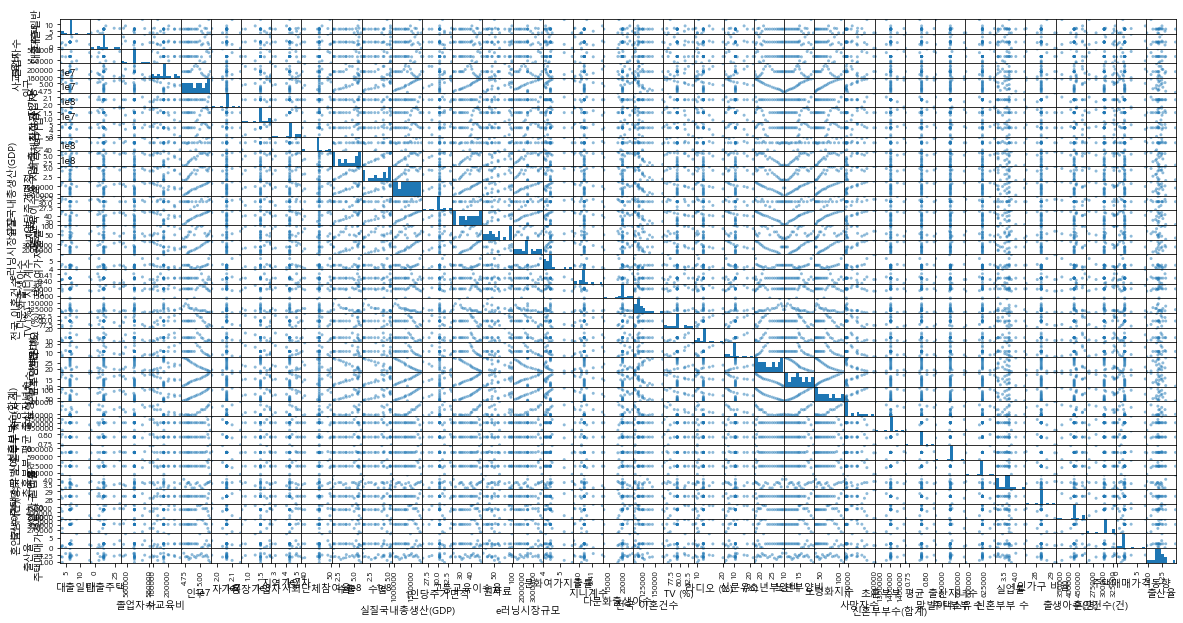

In [87]:
from pandas.plotting import scatter_matrix
scatter_matrix(dmean, figsize=(20,10))

In [95]:
# 변수들끼리 다중공선성 => 위에 상관계수 본것을 plot()으로 그려보자

%matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data=X.corr(), annot=True, fmt='.2f', linewidths=0.3, cmap='hot_r')

Using matplotlib backend: Qt5Agg


C:\Users\ICT01_10\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_10\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


In [121]:
from sklearn.ensemble import RandomForestRegressor
minmax_X = MinMaxScaler(X)
minmax_Y = MinMaxScaler(Y)
X_train, X_test, y_train, y_test = train_test_split(minmax_X, minmax_Y, shuffle=True,
                                                    train_size=0.7, random_state=42)
names=dmean.columns[:36]
rf = RandomForestRegressor()
rf.fit(X_train,y_train)


In [122]:
names

Index(['대출일반', '대출주택', '졸업자수', '사교육비', '인구', '자가용', '직장가입자', '지역가입자',
       '사회단체참여율', '수출', '수입', '실질국내총생산(GDP)', '1인당주거면적', '고등교육이수율', '원자료',
       'e러닝시장규모', '문화여가지출률', '지니계수', '다문화출생아수', '전국 이혼건수 ', 'TV (%)',
       '라디오 (%)', '신문 (%)', '유소년부양비', '노년부양비', '노령화지수', '사망자수', '신혼부부수(합계)',
       '초혼부부 평균 출산자녀수', '맞벌이 부부 수', '주택소유 신혼부부 수', '실업률', '1인가구 비율', '출생아수(명)',
       '혼인건수(건)', '주택매매가격동향'],
      dtype='object')

In [123]:
print(sorted(zip(map(lambda x: round(x,2),
                    rf.feature_importances_),names),reverse = True)) #내림차순 

[(0.22, '실업률'), (0.12, '원자료'), (0.1, '문화여가지출률'), (0.09, '신혼부부수(합계)'), (0.08, '고등교육이수율'), (0.08, 'e러닝시장규모'), (0.06, '사망자수'), (0.06, '대출주택'), (0.05, '자가용'), (0.03, '노년부양비'), (0.01, '혼인건수(건)'), (0.01, '출생아수(명)'), (0.01, '지니계수'), (0.01, '주택매매가격동향'), (0.01, '전국 이혼건수 '), (0.01, '인구'), (0.01, '실질국내총생산(GDP)'), (0.01, '신문 (%)'), (0.01, '수입'), (0.01, '다문화출생아수'), (0.0, '초혼부부 평균 출산자녀수'), (0.0, '직장가입자'), (0.0, '지역가입자'), (0.0, '주택소유 신혼부부 수'), (0.0, '졸업자수'), (0.0, '유소년부양비'), (0.0, '수출'), (0.0, '사회단체참여율'), (0.0, '사교육비'), (0.0, '맞벌이 부부 수'), (0.0, '라디오 (%)'), (0.0, '대출일반'), (0.0, '노령화지수'), (0.0, 'TV (%)'), (0.0, '1인당주거면적'), (0.0, '1인가구 비율')]


In [126]:
import numpy as np
from sklearn.decomposition import PCA

pca =PCA(n_components=20)  #주성분을 2개로 해라    #주성분 중 첫번째 것이 가장 큰 영향

#고유값 분해를 통해 나온 축은 원래데이터와는 다르다 _ 모든 변수가 조합해서 만들어 낸 축
#주성분 축은 별도로 생성된다
#츅이름을 재 명명해야함

print(pca.fit(X,Y))
print(pca.explained_variance_ratio_) #설명력  # [0.99244289 0.00755711] 앞에거가 첫번째 주성분의 설명력


print(pca.explained_variance_)  #분산이 큰게 주성분

print(pca.noise_variance_)

# 새로운 DATAFRAME

In [158]:
import pandas as pd
import numpy as np
df = pd.read_csv('team2.csv',index_col=0)

In [159]:
df

,출생아수,졸업자수,사교육비,인구,직장가입자,지역가입자,사회단체참여율,수출,수입,실질국내총생산(GDP),...,노년부양비,노령화지수,사망자수,실업률,1인가구 비율,혼인건수(건),주택매매가격동향,\t맞벌이가구비율,유치원수,어린이집수
2000,640089,558932.0,200400.0,47008111.0,75391264.0,27525025.0,44.8,172267511.0,160481015.0,947394.8,...,10.1,34.3,248740.0,4.4,15.5,326104.0,1.9,42.3,19276,8494
2001,559934,558932.0,200400.0,47370164.0,75391264.0,27525025.0,44.8,150439144.0,141097821.0,947394.8,...,10.5,36.2,243813.0,4.0,15.5,326104.0,1.9,42.1,20097,8407
2002,496911,558932.0,200400.0,47644736.0,75391264.0,27525025.0,44.8,162470528.0,152126153.0,1020582.4,...,11.0,38.6,247524.0,3.3,15.5,326104.0,1.9,42.0,22147,8343
2003,495036,558932.0,200400.0,47892330.0,75391264.0,27525025.0,44.8,193817443.0,178826657.0,1052703.1,...,11.5,41.1,246463.0,3.6,15.5,326104.0,1.9,42.0,24142,8292
2004,476958,558932.0,200400.0,48082519.0,75391264.0,27525025.0,38.8,253844672.0,224462687.0,1107416.2,...,12.0,43.8,246220.0,3.7,15.5,326104.0,1.9,42.2,26903,8246
2005,438707,558932.0,200400.0,48184561.0,75391264.0,27525025.0,38.8,284418743.0,261238264.0,1155129.7,...,12.5,46.8,245874.0,3.7,20.0,326104.0,1.9,42.6,28367,8275
2006,451759,558932.0,200400.0,48438292.0,75391264.0,27525025.0,38.8,325464848.0,309382632.0,1215939.5,...,13.0,50.4,244162.0,3.5,20.0,326104.0,1.9,42.6,29233,8290
2007,496822,558932.0,200400.0,48683638.0,75391264.0,27525025.0,39.8,371489086.0,356845733.0,1286458.5,...,13.5,54.6,246482.0,3.2,20.0,326104.0,1.9,43.0,30856,8294
2008,465892,558932.0,209095.0,49054708.0,75391264.0,27525025.0,39.8,422007328.0,435274737.0,1325219.3,...,14.0,58.8,246113.0,3.2,20.0,326104.0,1.9,43.2,33499,8344
2009,444849,558932.0,216259.0,49307835.0,75391264.0,27525025.0,39.8,363533561.0,323084521.0,1335724.3,...,14.4,62.9,246942.0,3.6,20.0,326104.0,1.9,43.0,35550,8373


In [160]:
df.corr().iloc[:,0] # 출생아수에 대해 corr() 상관계수 보는 거?? 출생아수가 종속변수?
 

출생아수            1.000000
졸업자수           -0.546187
사교육비            0.351348
인구             -0.806956
직장가입자          -0.589719
지역가입자          -0.530373
사회단체참여율        -0.307462
수출             -0.709129
수입             -0.653313
실질국내총생산(GDP)   -0.805866
1인당주거면적        -0.566131
고등교육이수율        -0.816703
원자료            -0.279709
e러닝시장규모        -0.766230
문화여가지출률        -0.694933
지니계수            0.567716
다문화출생아수        -0.416526
전국 이혼건수         0.428730
TV (%)          0.668100
라디오 (%)         0.617048
신문 (%)          0.682999
유소년부양비          0.776362
노년부양비          -0.839444
노령화지수          -0.807482
사망자수           -0.711671
실업률             0.314853
1인가구 비율        -0.776234
혼인건수(건)         0.727594
주택매매가격동향        0.133825
\t맞벌이가구비율      -0.716599
유치원수           -0.687933
어린이집수          -0.594952
Name: 출생아수, dtype: float64

In [161]:
X=df.iloc[:,1:]
y=df.iloc[:,0]


In [162]:
from sklearn.preprocessing import minmax_scale
minmax_X = minmax_scale(X)
minmax_y =  minmax_scale(y)
df.iloc[:,1:]=minmax_X
df.iloc[:,0] = minmax_y

In [163]:
df

,출생아수,졸업자수,사교육비,인구,직장가입자,지역가입자,사회단체참여율,수출,수입,실질국내총생산(GDP),...,노년부양비,노령화지수,사망자수,실업률,1인가구 비율,혼인건수(건),주택매매가격동향,\t맞벌이가구비율,유치원수,어린이집수
2000,1.000000,0.148319,0.581700,0.000000,0.000000,0.000000,0.530973,0.048036,0.049183,0.000000,...,0.000000,0.000000,0.089570,1.000000,0.000000,0.958259,0.275362,0.069767,0.000000,0.316731
2001,0.744132,0.148319,0.581700,0.078732,0.000000,0.000000,0.530973,0.000000,0.000000,0.000000,...,0.042105,0.024485,0.000000,0.692308,0.000000,0.958259,0.275362,0.023256,0.033518,0.205619
2002,0.542952,0.148319,0.581700,0.138441,0.000000,0.000000,0.530973,0.026476,0.027983,0.085068,...,0.094737,0.055412,0.067464,0.153846,0.000000,0.958259,0.275362,0.000000,0.117212,0.123883
2003,0.536967,0.148319,0.581700,0.192283,0.000000,0.000000,0.530973,0.095458,0.095733,0.122403,...,0.147368,0.087629,0.048176,0.384615,0.000000,0.958259,0.275362,0.000000,0.198661,0.058748
2004,0.479259,0.148319,0.581700,0.233642,0.000000,0.000000,0.000000,0.227555,0.211530,0.185998,...,0.200000,0.122423,0.043758,0.461538,0.000000,0.958259,0.275362,0.046512,0.311382,0.000000
2005,0.357155,0.148319,0.581700,0.255832,0.000000,0.000000,0.000000,0.294836,0.304844,0.241456,...,0.252632,0.161082,0.037468,0.461538,0.328467,0.958259,0.275362,0.139535,0.371152,0.037037
2006,0.398820,0.148319,0.581700,0.311009,0.000000,0.000000,0.000000,0.385162,0.427005,0.312137,...,0.305263,0.207474,0.006345,0.307692,0.328467,0.958259,0.275362,0.139535,0.406508,0.056194
2007,0.542668,0.148319,0.581700,0.364362,0.000000,0.000000,0.088496,0.486444,0.547438,0.394104,...,0.357895,0.261598,0.048521,0.076923,0.328467,0.958259,0.275362,0.232558,0.472769,0.061303
2008,0.443934,0.148319,0.811041,0.445055,0.000000,0.000000,0.088496,0.597614,0.746444,0.439157,...,0.410526,0.315722,0.041813,0.076923,0.328467,0.958259,0.275362,0.279070,0.580673,0.125160
2009,0.376762,0.148319,1.000000,0.500101,0.000000,0.000000,0.088496,0.468937,0.461773,0.451367,...,0.452632,0.368557,0.056884,0.384615,0.328467,0.958259,0.275362,0.232558,0.664408,0.162197


In [164]:
from sklearn.ensemble import RandomForestRegressor #분류 데이터 
rf = RandomForestRegressor()
rf.fit(minmax_X,minmax_y) # 정규화 시키지 않으면 domain knorege 알수없어... MSE 범위에 대한 지식이..


C:\Users\ICT01_10\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# mse

In [166]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mean_squared_error(minmax_y,rf.predict(X))



0.07017755303410195

# 변수 중요도 rank

In [167]:
X=df.iloc[:,1:]
y=df.iloc[:,0]
name = df.columns[1:]

print(sorted(zip(map(lambda x: round(x,2),
                    rf.feature_importances_),name),reverse = True)) #내림차순 

[(0.25, '유소년부양비'), (0.12, '고등교육이수율'), (0.1, '실업률'), (0.08, '어린이집수'), (0.07, '유치원수'), (0.06, '전국 이혼건수 '), (0.06, '수입'), (0.06, '노령화지수'), (0.05, '실질국내총생산(GDP)'), (0.03, '라디오 (%)'), (0.02, '원자료'), (0.02, '신문 (%)'), (0.01, '혼인건수(건)'), (0.01, '인구'), (0.01, '수출'), (0.01, '사망자수'), (0.01, '1인당주거면적'), (0.01, '1인가구 비율'), (0.0, '직장가입자'), (0.0, '지역가입자'), (0.0, '지니계수'), (0.0, '주택매매가격동향'), (0.0, '졸업자수'), (0.0, '사회단체참여율'), (0.0, '사교육비'), (0.0, '문화여가지출률'), (0.0, '다문화출생아수'), (0.0, '노년부양비'), (0.0, 'e러닝시장규모'), (0.0, 'TV (%)'), (0.0, '\t맞벌이가구비율')]


In [168]:
mean_absolute_error(minmax_y,rf.predict(X))


0.03168754146664533

# 변수 걸러내기

In [169]:
#feature selection


from sklearn.feature_selection import RFE  # recursive feature elimination (재귀적 특징제거 )
from sklearn.svm import SVR

estimator = SVR(kernel = 'linear') #svc로 만들었지만 커널=선형 지정  #Regression 예측  SVC : Classification
selector =RFE(estimator,16, step=1) 
#변수를 제거하는 이유 : 잡음제거 _s 영향력이 없는 변수들 
selector = selector.fit(X,y)
selector.support_
selector.ranking_

array([10, 11,  1,  6,  8,  1, 16, 13,  1,  1,  1,  1,  3,  1, 12, 15,  1,
        4,  5,  1,  2,  1,  1,  7,  1,  1,  1,  9, 14,  1,  1])

In [170]:
dd = sorted(zip(map(lambda x: x==1,
                    selector.ranking_),name),reverse = True) #내림차순 
dd

[(True, '혼인건수(건)'),
 (True, '전국 이혼건수 '),
 (True, '인구'),
 (True, '유치원수'),
 (True, '원자료'),
 (True, '어린이집수'),
 (True, '실질국내총생산(GDP)'),
 (True, '실업률'),
 (True, '신문 (%)'),
 (True, '사회단체참여율'),
 (True, '문화여가지출률'),
 (True, '노령화지수'),
 (True, '노년부양비'),
 (True, '고등교육이수율'),
 (True, '1인당주거면적'),
 (True, '1인가구 비율'),
 (False, '직장가입자'),
 (False, '지역가입자'),
 (False, '지니계수'),
 (False, '주택매매가격동향'),
 (False, '졸업자수'),
 (False, '유소년부양비'),
 (False, '수출'),
 (False, '수입'),
 (False, '사망자수'),
 (False, '사교육비'),
 (False, '라디오 (%)'),
 (False, '다문화출생아수'),
 (False, 'e러닝시장규모'),
 (False, 'TV (%)'),
 (False, '\t맞벌이가구비율')]

In [171]:
ddd = ['직장가입자','지역가입자','지니계수','주택매매가격동향','졸업자수','유소년부양비',
'수출','수입','사망자수','사교육비','라디오 (%)','다문화출생아수','e러닝시장규모','TV (%)','\t맞벌이가구비율']

In [172]:
df.drop(ddd,axis=1,inplace=True)

In [173]:
df

,출생아수,인구,사회단체참여율,실질국내총생산(GDP),1인당주거면적,고등교육이수율,원자료,문화여가지출률,전국 이혼건수,신문 (%),노년부양비,노령화지수,실업률,1인가구 비율,혼인건수(건),유치원수,어린이집수
2000,1.000000,0.000000,0.530973,0.000000,0.000000,0.000000,0.088112,0.090909,0.221556,1.000000,0.000000,0.000000,1.000000,0.000000,0.958259,0.000000,0.316731
2001,0.744132,0.078732,0.530973,0.000000,0.000000,0.011952,0.000000,0.090909,0.471668,1.000000,0.042105,0.024485,0.692308,0.000000,0.958259,0.033518,0.205619
2002,0.542952,0.138441,0.530973,0.085068,0.000000,0.083665,0.143816,0.090909,0.641710,1.000000,0.094737,0.055412,0.153846,0.000000,0.958259,0.117212,0.123883
2003,0.536967,0.192283,0.530973,0.122403,0.000000,0.223108,0.160527,0.090909,1.000000,1.000000,0.147368,0.087629,0.384615,0.000000,0.958259,0.198661,0.058748
2004,0.479259,0.233642,0.000000,0.185998,0.000000,0.262948,0.298899,0.090909,0.543039,1.000000,0.200000,0.122423,0.461538,0.000000,0.958259,0.311382,0.000000
2005,0.357155,0.255832,0.000000,0.241456,0.000000,0.306773,0.522724,0.090909,0.363176,1.000000,0.252632,0.161082,0.461538,0.328467,0.958259,0.371152,0.037037
2006,0.398820,0.311009,0.000000,0.312137,0.000000,0.358566,0.521712,0.090909,0.305224,1.000000,0.305263,0.207474,0.307692,0.328467,0.958259,0.406508,0.056194
2007,0.542668,0.364362,0.088496,0.394104,0.219178,0.426295,0.964173,0.073864,0.297763,1.000000,0.357895,0.261598,0.076923,0.328467,0.958259,0.472769,0.061303
2008,0.443934,0.445055,0.088496,0.439157,0.219178,0.505976,0.313457,0.000000,0.173360,1.000000,0.410526,0.315722,0.076923,0.328467,0.958259,0.580673,0.125160
2009,0.376762,0.500101,0.088496,0.451367,0.315068,0.589641,0.753513,0.022727,0.296559,1.000000,0.452632,0.368557,0.384615,0.328467,0.958259,0.664408,0.162197


# 모델링 

# xgb

In [174]:

import xgboost as xgb
from sklearn.metrics import mean_squared_error

# 데이터 프레임은 ndarray + dic : 중복가능/순서보장

X=df.iloc[:,1:]
y=df.iloc[:,0]
    
    

data_dmatrix = xgb.DMatrix(data = X,label =y)  
#xg 전용 매트릭스로 바꿔줘야함 #DMatrix 얘때문에 속도가 빠름  #label은 종속변수 



from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

# objective = 'reg:linear' 선형 회귀방식  # tree방식도 있음
# learning_rate(학습률) :경사하강법에 의해 동작하는 애들이 등장 
# max_depth 과적합 방지 



xg_reg = xgb.XGBRegressor(objective = 'reg:linear',colsample_bytree =0.3,  #col sample이 몇갠지
                         learning_rate =0.1, max_depth = 5,alpha =10,n_estimators =10)

xg_reg.fit(X_train,y_train)

preds=xg_reg.predict(X_test)# ybar(예측치)가 결정됨

rmse = np.sqrt(mean_squared_error(y_test,preds)) 
#예측상관계수 (MSE-Mean Square Error)_  차들(실제-예측)의 제곱 에 루트 : rmse
print('RMSE:%f'%(rmse))

[11:15:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE:0.274165


C:\Users\ICT01_10\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ICT01_10\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [175]:
dd = pd.DataFrame({'y_data':y_test,'preds':preds})
dd
#y_test
# preds

,y_data,preds
2000,1.000000,0.517385
2005,0.357155,0.478390
2011,0.461086,0.501539
2001,0.744132,0.517385


In [46]:
dd.corr()

,y_data,preds
y_data,1.000000,0.671403
preds,0.671403,1.000000


# Linear Regressor


In [47]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)  
result = model.fit()
print(result.summary())

result.params  

                            OLS Regression Results                            
Dep. Variable:                   출생아수   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Wed, 22 Jan 2020   Prob (F-statistic):                nan
Time:                        00:08:03   Log-Likelihood:                 483.13
No. Observations:                  15   AIC:                            -936.3
Df Residuals:                       0   BIC:                            -925.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
인구              -2.1640        inf         -0   

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


인구              -2.163978
사회단체참여율         -0.429853
실질국내총생산(GDP)     6.252506
1인당주거면적         -0.604412
고등교육이수율          5.499244
원자료              0.077745
문화여가지출률          0.175364
전국 이혼건수         -0.127229
신문 (%)          -0.725949
노년부양비          -15.231772
노령화지수            8.499688
실업률             -0.160706
1인가구 비율         -0.593180
혼인건수(건)          2.181181
유치원수            -2.821028
어린이집수            0.779209
dtype: float64

# SVR

In [184]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cross_val_score(model,X_train,y_train,scoring='recall',cv=10)

C:\Users\ICT01_10\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ICT01_10\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


ValueError: continuous is not supported

## SVR 모델평가


In [178]:
X_pred = model.predict(X_train)
print("MSE",mean_squared_error(y_train, X_pred))
X_train.shape
y_train.shape

NotFittedError: This SVR instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MSE",mean_squared_error(y_test, y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))
df1=pd.DataFrame({'y_data':y_test,'preds':y_pred})
df1.corr()

NameError: name 'y_pred' is not defined

### gridsearch CV

# DecisionTreeRegressor

In [99]:

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## DecisionTreeRegressor 모델평가

In [101]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MSE",mean_squared_error(y_test, y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))
df1=pd.DataFrame({'y_data':y_test,'preds':y_pred})
df1.corr()

MSE 0.06850619291730475
RMSE 0.2617368772590228
-0.0854470042663944


,y_data,preds
y_data,1.000000,0.913928
preds,0.913928,1.000000


# RandomForestRegressor

In [102]:
RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## RandomForestRegressor 모델평가

In [104]:
print("MSE",mean_squared_error(y_test, y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))
df1=pd.DataFrame({'y_data':y_test,'preds':y_pred})
df1.corr()

MSE 0.08413532262998877
RMSE 0.290060894692802
-0.33308289386256673


,y_data,preds
y_data,1.000000,0.757234
preds,0.757234,1.000000
